<a href="https://colab.research.google.com/github/WHITEWOLF1208/Tic-Tac-Toe/blob/main/ICICI_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr
import yfinance as yfin

In [231]:
yfin.pdr_override()
icici = pdr.get_data_yahoo("ICICIBANK.NS", start="2015-01-01", end="2022-12-31")
icici

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.636353,321.318176,318.363647,320.272736,297.216492,2583280
2015-01-02,320.000000,330.454559,320.000000,329.363647,305.652954,8272990
2015-01-05,332.090912,334.000000,328.636353,330.045441,306.285675,10316090
2015-01-06,326.727264,327.181824,314.727264,316.045441,293.293549,13282427
2015-01-07,314.181824,314.772736,304.954559,307.500000,285.363281,21254332
...,...,...,...,...,...,...
2022-12-26,881.099976,897.000000,875.250000,893.200012,885.907837,6943159
2022-12-27,897.700012,902.750000,888.200012,900.650024,893.296997,4994381
2022-12-28,896.000000,903.950012,895.799988,898.950012,891.610901,8980300


## **1. Refining Data**

In [232]:
icici.drop(columns = ['Adj Close','Volume'], inplace = True)
icici

,Open,High,Low,Close
Date,,,,
2015-01-01,320.636353,321.318176,318.363647,320.272736
2015-01-02,320.000000,330.454559,320.000000,329.363647
2015-01-05,332.090912,334.000000,328.636353,330.045441
2015-01-06,326.727264,327.181824,314.727264,316.045441
2015-01-07,314.181824,314.772736,304.954559,307.500000
...,...,...,...,...
2022-12-26,881.099976,897.000000,875.250000,893.200012
2022-12-27,897.700012,902.750000,888.200012,900.650024
2022-12-28,896.000000,903.950012,895.799988,898.950012


In [233]:
day = np.arange(1,len(icici)+1)
icici['Day'] = day
icici

,Open,High,Low,Close,Day
Date,,,,,
2015-01-01,320.636353,321.318176,318.363647,320.272736,1
2015-01-02,320.000000,330.454559,320.000000,329.363647,2
2015-01-05,332.090912,334.000000,328.636353,330.045441,3
2015-01-06,326.727264,327.181824,314.727264,316.045441,4
2015-01-07,314.181824,314.772736,304.954559,307.500000,5
...,...,...,...,...,...
2022-12-26,881.099976,897.000000,875.250000,893.200012,1972
2022-12-27,897.700012,902.750000,888.200012,900.650024,1973
2022-12-28,896.000000,903.950012,895.799988,898.950012,1974


In [234]:
icici = icici[['Day','Open','High','Low','Close']]
icici

,Day,Open,High,Low,Close
Date,,,,,
2015-01-01,1,320.636353,321.318176,318.363647,320.272736
2015-01-02,2,320.000000,330.454559,320.000000,329.363647
2015-01-05,3,332.090912,334.000000,328.636353,330.045441
2015-01-06,4,326.727264,327.181824,314.727264,316.045441
2015-01-07,5,314.181824,314.772736,304.954559,307.500000
...,...,...,...,...,...
2022-12-26,1972,881.099976,897.000000,875.250000,893.200012
2022-12-27,1973,897.700012,902.750000,888.200012,900.650024
2022-12-28,1974,896.000000,903.950012,895.799988,898.950012


## **2. Adding Moving Averages**


In [235]:
icici['9 day SMA'] = icici['Close'].rolling(9).mean().shift()
icici['21 day SMA'] = icici['Close'].rolling(21).mean().shift()
icici.dropna(inplace = True)
icici
#using shift as in live market we wouldn't know the future prices.

<ipython-input-235-f09bd9f1ace2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icici['9 day SMA'] = icici['Close'].rolling(9).mean().shift()
<ipython-input-235-f09bd9f1ace2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icici['21 day SMA'] = icici['Close'].rolling(21).mean().shift()
<ipython-input-235-f09bd9f1ace2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

,Day,Open,High,Low,Close,9 day SMA,21 day SMA
Date,,,,,,,
2015-02-02,22,327.545441,327.909088,318.181824,319.863647,337.984846,325.971861
2015-02-03,23,320.000000,324.363647,313.727264,315.090912,337.080807,325.952381
2015-02-04,24,314.590912,315.681824,309.318176,313.318176,334.944444,325.272727
2015-02-05,25,309.909088,313.909088,302.500000,305.090912,332.540402,324.476190
2015-02-06,26,305.454559,309.090912,297.909088,299.409088,329.085856,323.954546
...,...,...,...,...,...,...,...
2022-12-26,1972,881.099976,897.000000,875.250000,893.200012,904.827786,921.528579
2022-12-27,1973,897.700012,902.750000,888.200012,900.650024,900.411119,919.761913
2022-12-28,1974,896.000000,903.950012,895.799988,898.950012,898.066678,918.011913


## **3. Creating Signals**

In [236]:
icici['Signal'] = np.where((icici['9 day SMA'] - icici['21 day SMA'])>0.035*icici['Close'], 1, np.nan )
icici['Signal'] = np.where((icici['21 day SMA'] - icici['9 day SMA'])>0.04*icici['Close'], -1, icici['Signal'])
icici['Signal'] = icici['Signal'].ffill()

<ipython-input-236-dbf2fd7b7e96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icici['Signal'] = np.where((icici['9 day SMA'] - icici['21 day SMA'])>0.035*icici['Close'], 1, np.nan )
<ipython-input-236-dbf2fd7b7e96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icici['Signal'] = np.where((icici['21 day SMA'] - icici['9 day SMA'])>0.04*icici['Close'], -1, icici['Signal'])
<ipython-input-236-dbf2fd7b7e96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [237]:
icici

,Day,Open,High,Low,Close,9 day SMA,21 day SMA,Signal
Date,,,,,,,,
2015-02-02,22,327.545441,327.909088,318.181824,319.863647,337.984846,325.971861,1.0
2015-02-03,23,320.000000,324.363647,313.727264,315.090912,337.080807,325.952381,1.0
2015-02-04,24,314.590912,315.681824,309.318176,313.318176,334.944444,325.272727,1.0
2015-02-05,25,309.909088,313.909088,302.500000,305.090912,332.540402,324.476190,1.0
2015-02-06,26,305.454559,309.090912,297.909088,299.409088,329.085856,323.954546,1.0
...,...,...,...,...,...,...,...,...
2022-12-26,1972,881.099976,897.000000,875.250000,893.200012,904.827786,921.528579,1.0
2022-12-27,1973,897.700012,902.750000,888.200012,900.650024,900.411119,919.761913,1.0
2022-12-28,1974,896.000000,903.950012,895.799988,898.950012,898.066678,918.011913,1.0


## **4. Calculating Returns**

In [238]:
icici['Long Return'] = np.log(icici['Close']).diff()
icici['Strat Return'] = icici['Signal'] * icici['Long Return']
icici['Signal'].isnull().sum()

<ipython-input-238-ef38c942df8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icici['Long Return'] = np.log(icici['Close']).diff()
<ipython-input-238-ef38c942df8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icici['Strat Return'] = icici['Signal'] * icici['Long Return']


0

In [239]:
np.exp(icici['Long Return']).cumprod()[-1] - 1

1.7850929064851941

In [240]:
icici['entry'] = icici.Signal.diff()
icici.dropna(inplace= True)
icici

<ipython-input-240-8e91d8d39831>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icici['entry'] = icici.Signal.diff()
<ipython-input-240-8e91d8d39831>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  icici.dropna(inplace= True)


,Day,Open,High,Low,Close,9 day SMA,21 day SMA,Signal,Long Return,Strat Return,entry
Date,,,,,,,,,,,
2015-02-03,23,320.000000,324.363647,313.727264,315.090912,337.080807,325.952381,1.0,-0.015034,-0.015034,0.0
2015-02-04,24,314.590912,315.681824,309.318176,313.318176,334.944444,325.272727,1.0,-0.005642,-0.005642,0.0
2015-02-05,25,309.909088,313.909088,302.500000,305.090912,332.540402,324.476190,1.0,-0.026609,-0.026609,0.0
2015-02-06,26,305.454559,309.090912,297.909088,299.409088,329.085856,323.954546,1.0,-0.018799,-0.018799,0.0
2015-02-09,27,297.727264,297.727264,289.545441,290.954559,324.909088,323.569265,1.0,-0.028644,-0.028644,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1972,881.099976,897.000000,875.250000,893.200012,904.827786,921.528579,1.0,0.016139,0.016139,0.0
2022-12-27,1973,897.700012,902.750000,888.200012,900.650024,900.411119,919.761913,1.0,0.008306,0.008306,0.0
2022-12-28,1974,896.000000,903.950012,895.799988,898.950012,898.066678,918.011913,1.0,-0.001889,-0.001889,0.0


In [241]:
np.exp(icici['Long Return']).cumprod()[-1] - 1

1.7850929064851941

## **5. Comparing Returns**

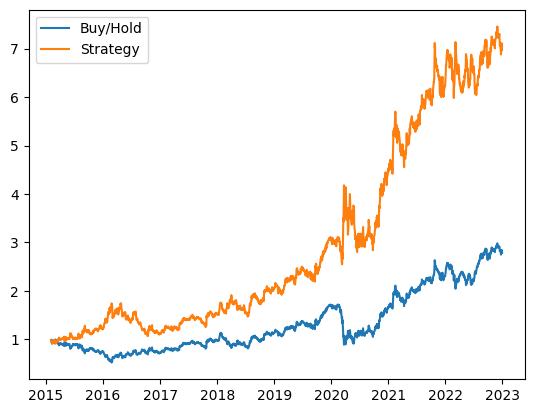

In [242]:
plt.plot(np.exp(icici['Long Return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(icici['Strat Return']).cumprod(), label='Strategy')
plt.legend()

In [243]:
np.exp(icici['Long Return']).cumprod()[-1] - 1

1.7850929064851941

In [244]:
np.exp(icici['Strat Return']).cumprod()[-1] - 1

5.972606846255755